In [1]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import sklearn
from seaborn import countplot
from seaborn import heatmap
from sklearn import preprocessing
from sklearn import model_selection

In [2]:
buildings_df = pd.read_csv('2019_Building_Energy_Benchmarking.csv')

In [3]:
# Examine the rows and columns of dataset

buildings_df.shape

(3581, 42)

In [4]:
# Summarize datatypes, column names, and non-null values

buildings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3581 non-null   int64  
 1   DataYear                         3581 non-null   int64  
 2   BuildingName                     3581 non-null   object 
 3   BuildingType                     3581 non-null   object 
 4   TaxParcelIdentificationNumber    3581 non-null   object 
 5   Address                          3581 non-null   object 
 6   City                             3580 non-null   object 
 7   State                            3580 non-null   object 
 8   ZipCode                          3525 non-null   float64
 9   Latitude                         3579 non-null   float64
 10  Longitude                        3579 non-null   float64
 11  Neighborhood                     3579 non-null   object 
 12  CouncilDistrictCode 

In [5]:
# Add summary statistics

buildings_df.describe()

,OSEBuildingID,DataYear,ZipCode,Latitude,Longitude,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),...,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3581.000000,3581.0,3525.000000,3579.000000,3579.000000,3564.000000,3581.000000,3581.000000,3.581000e+03,3.581000e+03,...,3.516000e+03,1874.000000,680.000000,3.581000e+03,3.581000e+03,3.581000e+03,3.581000e+03,3.581000e+03,3581.000000,3581.000000
mean,23028.275621,2019.0,98116.856738,47.624629,-122.334813,3.196970,1971.748394,4.955599,1.051878e+05,8.989954e+04,...,8.444409e+04,31375.687834,13708.389706,1.015145e+06,1.964906e+06,1.540816e+04,3.463675e+06,1.540816e+06,207.641413,1.500475
std,13692.789598,0.0,17.326443,0.047046,0.027053,2.327261,34.106792,5.627743,2.331367e+05,2.115737e+05,...,2.022722e+05,57133.774557,31720.518662,2.802552e+06,9.776464e+07,7.943944e+04,9.562307e+06,7.943944e+06,5217.819182,15.604321
min,1.000000,2019.0,98101.000000,47.499170,-122.414250,1.000000,1896.000000,0.000000,2.000000e+04,9.660000e+03,...,5.100000e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,20199.000000,2019.0,98105.000000,47.601045,-122.350555,1.000000,1952.000000,3.000000,2.934000e+04,2.746800e+04,...,2.581800e+04,5415.500000,2574.750000,1.806240e+05,0.000000e+00,0.000000e+00,6.162890e+05,0.000000e+00,8.000000,0.200000
50%,23454.000000,2019.0,98115.000000,47.619210,-122.332450,3.000000,1979.000000,4.000000,4.658000e+04,4.346000e+04,...,4.155100e+04,12000.000000,6000.000000,3.375280e+05,0.000000e+00,3.494000e+03,1.151647e+06,3.494040e+05,33.700000,0.700000
75%,26670.000000,2019.0,98122.000000,47.657080,-122.318925,5.000000,2000.000000,6.000000,9.866800e+04,8.795800e+04,...,8.147800e+04,30613.750000,12543.250000,8.088200e+05,0.000000e+00,1.358800e+04,2.759693e+06,1.358817e+06,98.300000,1.500000
max,50634.000000,2019.0,98199.000000,47.733870,-122.258640,7.000000,2019.000000,76.000000,9.320156e+06,9.320156e+06,...,9.236849e+06,686750.000000,480625.000000,7.660156e+07,5.845455e+09,3.880064e+06,2.613645e+08,3.880064e+08,310839.600000,927.700000


In [6]:
# Set index equal to OSEBuildingID

buildings_df.set_index('OSEBuildingID')

,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,Longitude,...,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),EPAPropertyType,ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,2019,MAYFLOWER PARK HOTEL,NonResidential,0659000030,405 OLIVE WAY,SEATTLE,WA,98101.0,47.61220,-122.33799,...,1134817,2159078,13208,Hotel,Compliant,No Issue,3871996,1320791,208.8,2.4
2,2019,PARAMOUNT HOTEL,NonResidential,0659000220,724 PINE ST,SEATTLE,WA,98101.0,47.61317,-122.33393,...,863688,0,50595,Hotel,Compliant,No Issue,2946902,5059502,286.9,3.2
3,2019,WESTIN HOTEL (Parent Building),NonResidential,0659000475,1900 5TH AVE,SEATTLE,WA,98101.0,47.61367,-122.33822,...,12917890,22601024,14264,Hotel,Compliant,No Issue,44075841,1426400,1549.0,2.0
5,2019,HOTEL MAX,NonResidential,0659000640,620 STEWART ST,SEATTLE,WA,98101.0,47.61412,-122.33664,...,645119,2104444,20134,Hotel,Compliant,No Issue,2201145,2013415,232.4,3.8
8,2019,WARWICK SEATTLE HOTEL,NonResidential,0659000970,401 LENORA ST,SEATTLE,WA,98121.0,47.61375,-122.34047,...,1595784,0,104303,Hotel,Compliant,No Issue,5444815,10430292,587.5,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50540,2019,EVEN HOTELS & STAYBRIDGE SUITES,NonResidential,1983200540,527 FAIRVIEW AVE N,SEATTLE,WA,98109.0,47.62403,-122.33485,...,0,0,0,NaN,Not Compliant,Portfolio Manager Account Not Shared,0,0,0.0,0.0
50542,2019,Aegis Living in Ravenna,NonResidential,5100400245,8511 15TH AVE NE,SEATTLE,WA,98115.0,47.69050,-122.31320,...,655350,0,0,Senior Care Community,Compliant,No Issue,2236055,0,13.8,0.2
50543,2019,AEGIS WEST SEATTLE,NonResidential,9276200910,4700 SW ADMIRAL WAY,SEATTLE,WA,98116.0,47.58099,-122.39305,...,744809,0,23401,Senior Care Community,Compliant,No Issue,2541289,2340118,139.9,2.1


In [7]:
# Verifying that all rows are associated with WA (Washington State)

buildings_df['State'].value_counts()

WA    3580
Name: State, dtype: int64

In [8]:
# Verifying that all rows are associated with Seattle

buildings_df['City'].value_counts()

SEATTLE     3572
Seattle        7
SEATTLEW       1
Name: City, dtype: int64

In [9]:
# Dropping the City and State columns

buildings_df.drop(columns=['City','State'], inplace=True)

In [10]:
# Find counts of missing values per column

buildings_df.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingName                          0
BuildingType                          0
TaxParcelIdentificationNumber         0
Address                               0
ZipCode                              56
Latitude                              2
Longitude                             2
Neighborhood                          2
CouncilDistrictCode                  17
YearBuilt                             0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFABuilding(s)                0
PropertyGFAParking                    0
PrimaryPropertyType                  65
ENERGYSTARScore                    1014
SiteEUIWN(kBtu/sf)                  169
SiteEUI(kBtu/sf)                    135
SiteEnergyUse(kBtu)                 169
SiteEnergyUseWN(kBtu)               135
SourceEUIWN(kBtu/sf)                169
SourceEUI(kBtu/sf)                  135
LargestPropertyUseType               65


In [11]:
# Dropping the rows for which ENERGYSTARScore is null

buildings_df = buildings_df[buildings_df['ENERGYSTARScore'].notna()]
buildings_df.shape

(2567, 40)

In [12]:
buildings_df.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingName                          0
BuildingType                          0
TaxParcelIdentificationNumber         0
Address                               0
ZipCode                              45
Latitude                              0
Longitude                             0
Neighborhood                          0
CouncilDistrictCode                   8
YearBuilt                             0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFABuilding(s)                0
PropertyGFAParking                    0
PrimaryPropertyType                   0
ENERGYSTARScore                       0
SiteEUIWN(kBtu/sf)                   27
SiteEUI(kBtu/sf)                      0
SiteEnergyUse(kBtu)                  27
SiteEnergyUseWN(kBtu)                 0
SourceEUIWN(kBtu/sf)                 27
SourceEUI(kBtu/sf)                    0
LargestPropertyUseType                0


In [13]:
# Replace NaN with string for additional PropertyUseTypes

buildings_df[['SecondLargestPropertyUseType','ThirdLargestPropertyUseType']] = buildings_df[['SecondLargestPropertyUseType','ThirdLargestPropertyUseType']].fillna('N/A')

In [14]:
# Change NaN floor areas to 0

buildings_df[['SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']] = buildings_df[['SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']].fillna(0.0)

In [15]:
# Since there are so few null entries for ZipCode, CouncilDistrictCode, and SiteEUI columns, just drop rows for which values 
# in those columns are NaN. They will likely not materially affect the results of the analysis

buildings_df = buildings_df.dropna(subset=['ZipCode','CouncilDistrictCode','SiteEUIWN(kBtu/sf)'])

In [16]:
buildings_df.isnull().sum()

OSEBuildingID                      0
DataYear                           0
BuildingName                       0
BuildingType                       0
TaxParcelIdentificationNumber      0
Address                            0
ZipCode                            0
Latitude                           0
Longitude                          0
Neighborhood                       0
CouncilDistrictCode                0
YearBuilt                          0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFABuilding(s)             0
PropertyGFAParking                 0
PrimaryPropertyType                0
ENERGYSTARScore                    0
SiteEUIWN(kBtu/sf)                 0
SiteEUI(kBtu/sf)                   0
SiteEnergyUse(kBtu)                0
SiteEnergyUseWN(kBtu)              0
SourceEUIWN(kBtu/sf)               0
SourceEUI(kBtu/sf)                 0
LargestPropertyUseType             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseType       0
S

In [17]:
buildings_df.shape

(2497, 40)

In [18]:
buildings_df.describe()

,OSEBuildingID,DataYear,ZipCode,Latitude,Longitude,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),...,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,2497.000000,2497.0,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2.497000e+03,2.497000e+03,...,2.497000e+03,2497.000000,2497.000000,2.497000e+03,2.497000e+03,2.497000e+03,2.497000e+03,2.497000e+03,2497.000000,2497.000000
mean,22465.007609,2019.0,98116.589908,47.625617,-122.334586,3.299159,1973.231878,5.356027,1.046123e+05,8.892008e+04,...,8.511706e+04,16622.028034,2052.885863,9.803736e+05,2.596256e+06,1.313802e+04,3.345035e+06,1.313802e+06,228.416300,1.446496
std,13145.625273,0.0,16.993471,0.048332,0.027310,2.319919,32.449361,6.182471,1.678181e+05,1.373465e+05,...,1.274019e+05,41849.783074,12814.785047,2.643472e+06,1.170357e+08,4.337877e+04,9.019527e+06,4.337876e+06,6228.201336,18.594069
min,1.000000,2019.0,98101.000000,47.499170,-122.414250,1.000000,1900.000000,0.000000,2.001000e+04,9.660000e+03,...,6.213000e+03,0.000000,0.000000,7.240000e+02,0.000000e+00,0.000000e+00,2.471000e+03,0.000000e+00,0.000000,0.000000
25%,20153.000000,2019.0,98105.000000,47.602460,-122.351330,1.000000,1957.000000,3.000000,3.079600e+04,2.832800e+04,...,2.744700e+04,0.000000,0.000000,1.982970e+05,0.000000e+00,0.000000e+00,6.765880e+05,0.000000e+00,8.400000,0.200000
50%,23327.000000,2019.0,98112.000000,47.619840,-122.332240,3.000000,1979.000000,4.000000,4.929100e+04,4.534800e+04,...,4.409100e+04,0.000000,0.000000,3.612510e+05,0.000000e+00,3.643000e+03,1.232589e+06,3.642840e+05,34.400000,0.600000
75%,26359.000000,2019.0,98122.000000,47.658750,-122.318770,5.000000,2000.000000,6.000000,1.043520e+05,9.080300e+04,...,8.843400e+04,13119.000000,0.000000,8.175140e+05,0.000000e+00,1.365100e+04,2.789358e+06,1.365143e+06,96.300000,1.400000
max,50634.000000,2019.0,98199.000000,47.733870,-122.258640,7.000000,2019.000000,76.000000,2.080885e+06,1.926841e+06,...,1.639334e+06,441551.000000,325225.000000,7.660156e+07,5.845455e+09,1.426897e+06,2.613645e+08,1.426897e+08,310839.600000,927.700000


Text(0.5, 1.0, 'Energy Star Scores in 2019 Seattle Benchmarking Dataset')

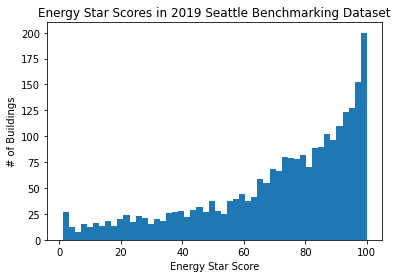

In [19]:
# Histogram of the Energy Star Score

plt.hist(buildings_df['ENERGYSTARScore'], bins = 50)
plt.xlabel('Energy Star Score')
plt.ylabel('# of Buildings') 
plt.title('Energy Star Scores in 2019 Seattle Benchmarking Dataset')

In [20]:
# Make a smaller subset of columns containing numerical data

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_cols = list(buildings_df.select_dtypes(include=numerics).columns)

remove = ['ENERGYSTARScore', 'OSEBuildingID','DataYear','ZipCode','CouncilDistrictCode',
          'Latitude', 'Longitude','Electricity(kWh)','NaturalGas(therms)','SteamUse(kBtu)','ThirdLargestPropertyUseTypeGFA']

numeric_cols = [x for x in numeric_cols if x not in remove]

buildings_numeric_df = buildings_df[numeric_cols]

In [21]:
buildings_numeric_df.shape

(2497, 17)

In [22]:
# Removing some of the outliers (points beyond 2 Standard Deviations from the mean)

for col in buildings_numeric_df.columns:
    buildings_numeric_df = buildings_numeric_df[np.abs(buildings_numeric_df[col]-buildings_numeric_df[col].mean()) <= (2*buildings_numeric_df[col].std())]

In [23]:
buildings_numeric_df.shape

(1011, 17)

In [24]:
# Perform log transformation of right skewed distributions

buildings_numeric_df = buildings_numeric_df + 0.0001

transform_cols = ['PropertyGFATotal','PropertyGFABuilding(s)','PropertyGFAParking',
        'SiteEUIWN(kBtu/sf)','SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)',
        'SourceEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',
        'Electricity(kBtu)','NaturalGas(kBtu)','TotalGHGEmissions','GHGEmissionsIntensity']

transform_cols_df = np.log(buildings_numeric_df[transform_cols])

In [25]:
buildings_numeric_transformed_df = buildings_numeric_df

for col in transform_cols:
    buildings_numeric_transformed_df[col] = transform_cols_df[col]

array([[<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'NumberofFloors'}>,
        <AxesSubplot:title={'center':'PropertyGFATotal'}>,
        <AxesSubplot:title={'center':'PropertyGFABuilding(s)'}>],
       [<AxesSubplot:title={'center':'PropertyGFAParking'}>,
        <AxesSubplot:title={'center':'SiteEUIWN(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEUI(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEnergyUse(kBtu)'}>],
       [<AxesSubplot:title={'center':'SiteEnergyUseWN(kBtu)'}>,
        <AxesSubplot:title={'center':'SourceEUIWN(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SourceEUI(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'LargestPropertyUseTypeGFA'}>],
       [<AxesSubplot:title={'center':'SecondLargestPropertyUseTypeGFA'}>,
        <AxesSubplot:title={'center':'Electricity(kBtu)'}>,
        <AxesSubplot:title={'center':'NaturalGas(kBtu)'}>,
        <AxesSubplot:title={'center':'TotalGHGEmissions'}>],
       [<Ax

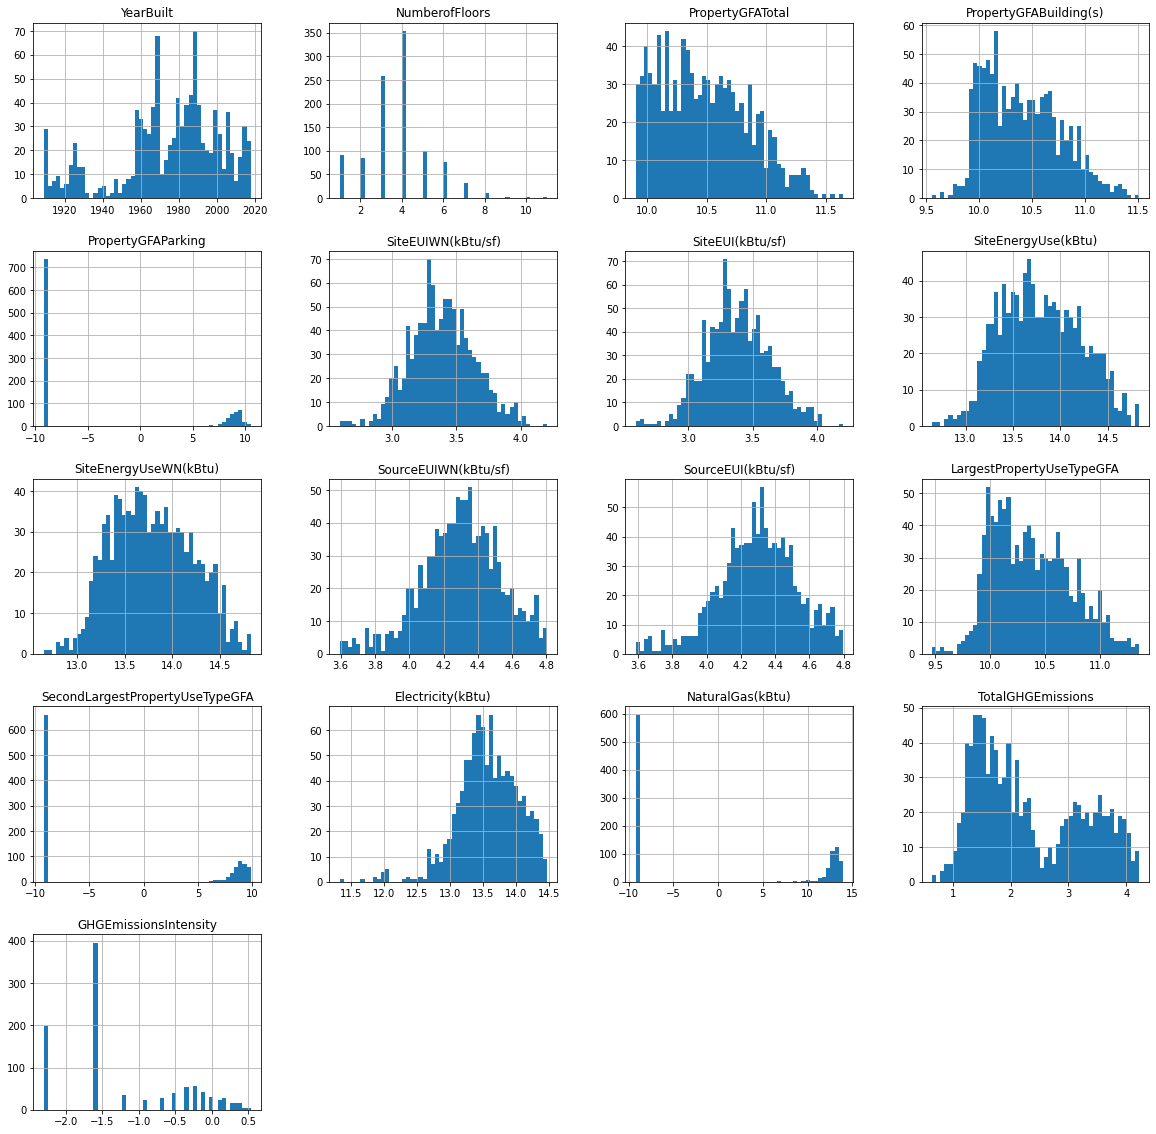

In [26]:
# Create histograms for each numerical variable of interest

buildings_numeric_transformed_df.hist(figsize=(20, 20), bins=50)

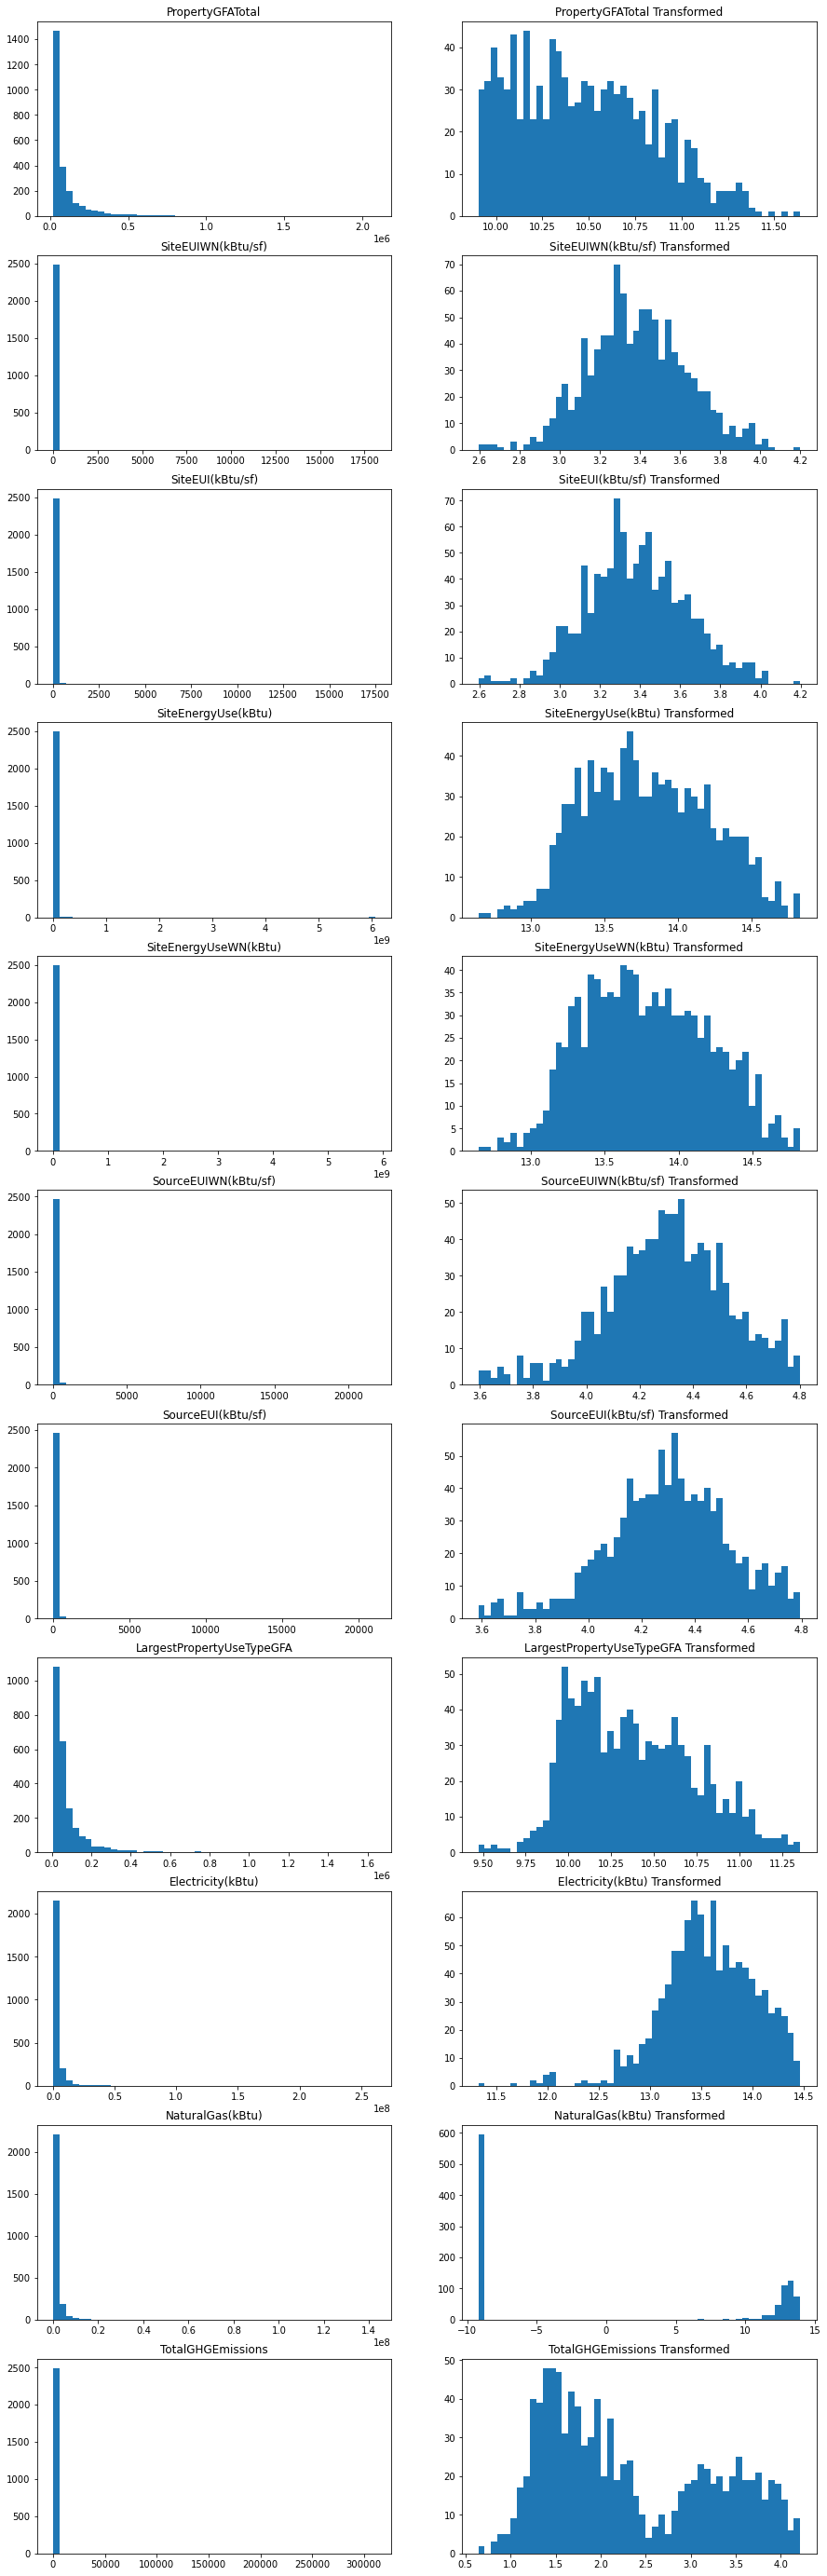

In [27]:
# Compare transformed and un-transformed variable histograms

compare_cols = ['PropertyGFATotal', 'SiteEUIWN(kBtu/sf)','SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)',
        'SourceEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','LargestPropertyUseTypeGFA','Electricity(kBtu)','NaturalGas(kBtu)',
        'TotalGHGEmissions']

fig, axes = plt.subplots(len(compare_cols), 2, figsize=(15,50))

for i in range(len(compare_cols)):
    ax = axes[i][0]
    ax.hist(buildings_df[compare_cols[i]], bins=50)
    ax.set_title(compare_cols[i])
    ax = axes[i][1]
    ax.hist(buildings_numeric_transformed_df[compare_cols[i]], bins=50)
    ax.set_title(compare_cols[i] + ' Transformed')

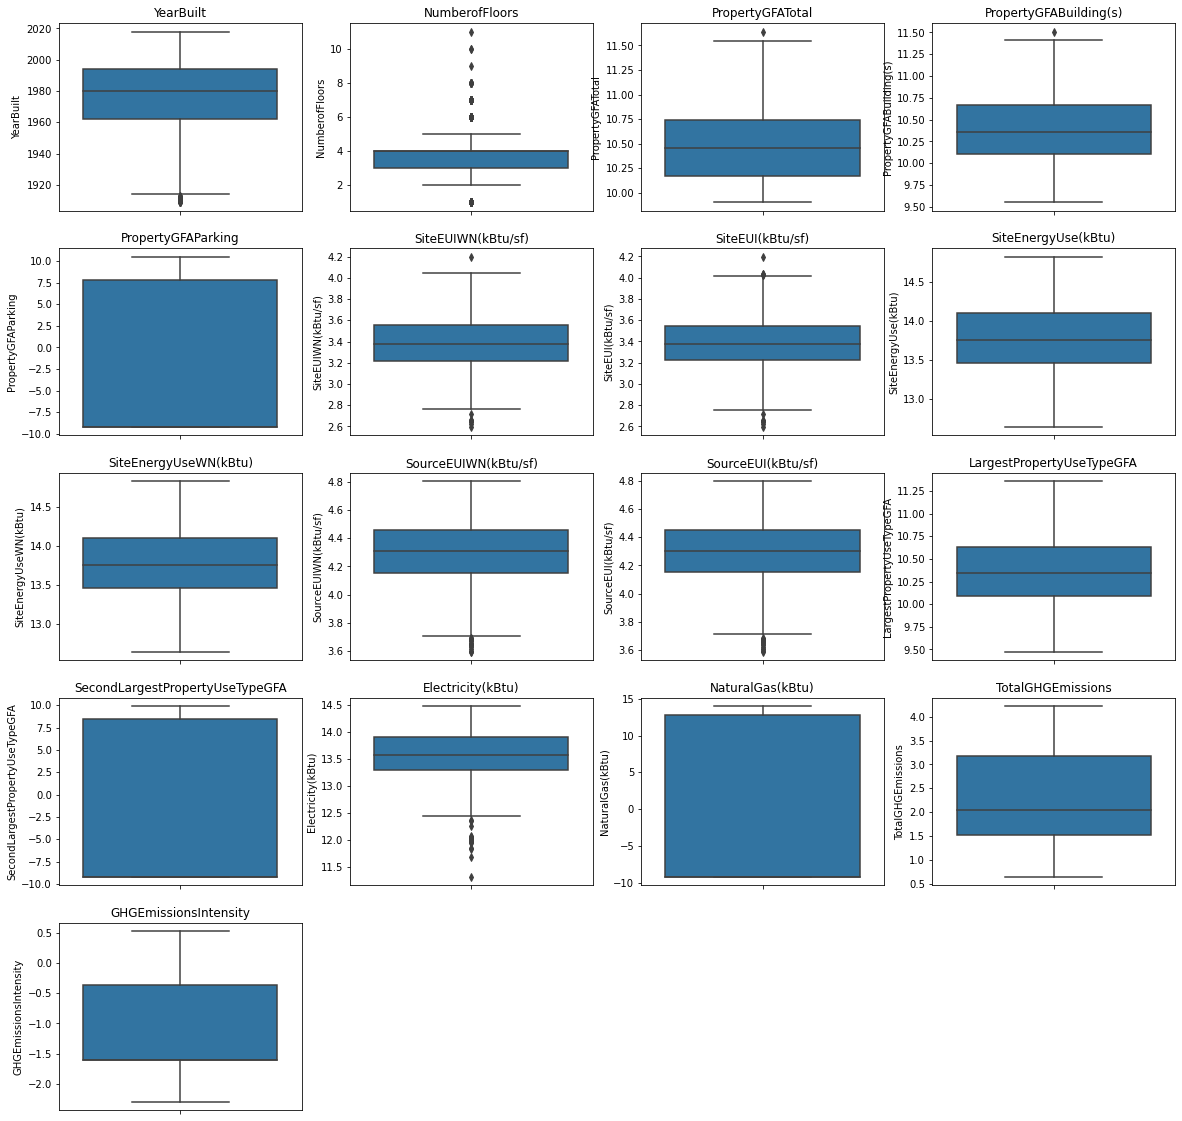

In [28]:
# Create box plots to better identify outliers


fig = plt.figure(figsize=(20,20))

a = 5
b = 4
c = 1

for i in numeric_cols:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c))
    sns.boxplot(y=buildings_numeric_transformed_df[i])
    c = c + 1

plt.show()

In [29]:
for col in buildings_numeric_transformed_df:
    buildings_df[col] = buildings_numeric_transformed_df[col]

Text(0.5, 1.0, 'Property Gross Floor Area vs. Total Greenhouse Gas Emissions')

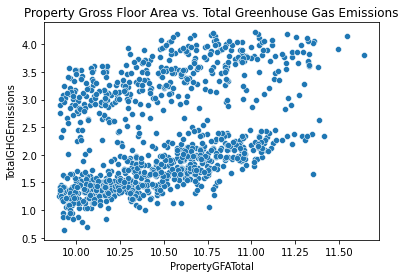

In [30]:
# Create scatterplots to check correlations between different variables

sns.scatterplot(data=buildings_df, x="PropertyGFATotal", y="TotalGHGEmissions").set_title('Property Gross Floor Area vs. Total Greenhouse Gas Emissions')

Text(0.5, 1.0, 'Site Energy Use Intensity vs. Source Energy Use Intensity')

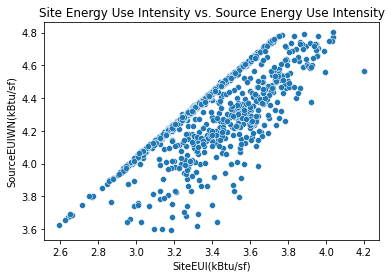

In [31]:
sns.scatterplot(data=buildings_df, x='SiteEUI(kBtu/sf)', y='SourceEUIWN(kBtu/sf)').set_title('Site Energy Use Intensity vs. Source Energy Use Intensity')

Text(0.5, 1.0, 'Site Energy Use Intensity vs. Greenhouse Gas Emissions Intensity')

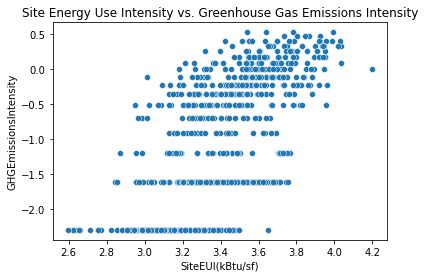

In [32]:
sns.scatterplot(data=buildings_df, x='SiteEUI(kBtu/sf)', y='GHGEmissionsIntensity').set_title('Site Energy Use Intensity vs. Greenhouse Gas Emissions Intensity')

Text(0.5, 1.0, 'Source Energy Use Intensity vs. Greenhouse Gas Emissions Intensity')

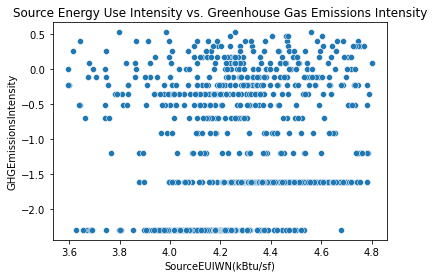

In [33]:
sns.scatterplot(data=buildings_df, x='SourceEUIWN(kBtu/sf)', y='GHGEmissionsIntensity').set_title('Source Energy Use Intensity vs. Greenhouse Gas Emissions Intensity')

Text(0.5, 1.0, 'Electricity Usage vs. Total Greenhouse Gas Emissions')

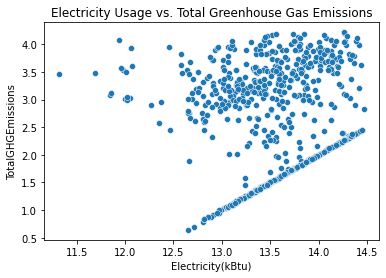

In [34]:
sns.scatterplot(data=buildings_df, x='Electricity(kBtu)', y='TotalGHGEmissions').set_title('Electricity Usage vs. Total Greenhouse Gas Emissions')

Text(0.5, 1.0, 'Natural Gas Usage vs. Total Greenhouse Gas Emissions')

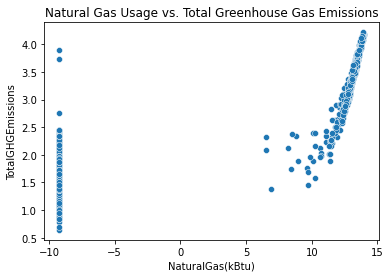

In [35]:
sns.scatterplot(data=buildings_df, x='NaturalGas(kBtu)', y='TotalGHGEmissions').set_title('Natural Gas Usage vs. Total Greenhouse Gas Emissions')

In [36]:
# Obtaining list of columns containing variables with object datatypes - seeing which of these are categorical variables
# from which we can create dummy variable columns

obj_cols = list(buildings_df.select_dtypes(include=object).columns)

obj_cols

['BuildingName',
 'BuildingType',
 'TaxParcelIdentificationNumber',
 'Address',
 'Neighborhood',
 'PrimaryPropertyType',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'EPAPropertyType',
 'ComplianceStatus',
 'ComplianceIssue']

In [37]:
# Checking unique values of BuildingType column

buildings_df['BuildingType'].value_counts()

NonResidential          920
Multifamily LR (1-4)    839
Multifamily MR (5-9)    514
Multifamily HR (10+)    107
SPS-District K-12        94
Campus                   13
Nonresidential COS        9
Nonresidential WA         1
Name: BuildingType, dtype: int64

In [38]:
# Consolidate Nonresidential values

buildings_df['BuildingType'] = buildings_df['BuildingType'].replace(['Nonresidential COS','Nonresidential WA'],'NonResidential')

buildings_df['BuildingType'].value_counts()


NonResidential          930
Multifamily LR (1-4)    839
Multifamily MR (5-9)    514
Multifamily HR (10+)    107
SPS-District K-12        94
Campus                   13
Name: BuildingType, dtype: int64

In [39]:
# Perform same check for Neighborhood column

buildings_df['Neighborhood'].value_counts()

DOWNTOWN                                                 411
EAST                                                     357
MAGNOLIA / QUEEN ANNE                                    318
GREATER DUWAMISH                                         234
NORTHEAST                                                207
LAKE UNION                                               189
NORTHWEST                                                163
NORTH                                                    116
SOUTHWEST                                                113
BALLARD                                                   98
SOUTHEAST                                                 82
CENTRAL                                                   72
DELRIDGE NEIGHBORHOODS                                    64
SHARED: NORTH &amp; NORTHWEST                             34
SHARED: CENTRAL &amp; EAST                                20
SHARED: LAKE UNION &amp; NORTHWEST                         9
SHARED: BALLARD &amp; LA

In [40]:
# "water" is a weird neighborhood. Since there are only 3 values, going to manually search which neighborhood these
# "should" be in

buildings_df.loc[buildings_df['Neighborhood']=='water','Address']

2373    1818 WESTLAKE AVE N
2561    2301 FAIRVIEW AVE E
3026     334 LAKESIDE AVE S
Name: Address, dtype: object

In [41]:
# All of these values are along Lake Union. I'm going to assign them to the Lake Union neighborhood in our dataset
# Also going to move the properties assigned as "SHARED" to their respective neighborhoods with a larger number of properties

buildings_df['Neighborhood'] = buildings_df['Neighborhood'].replace(['water'],'LAKE UNION')
buildings_df['Neighborhood'] = buildings_df['Neighborhood'].replace(['SHARED: NORTH &amp; NORTHWEST'],'NORTHWEST')
buildings_df['Neighborhood'] = buildings_df['Neighborhood'].replace(['SHARED: CENTRAL &amp; EAST'],'EAST')
buildings_df['Neighborhood'] = buildings_df['Neighborhood'].replace(['SHARED: LAKE UNION &amp; NORTHWEST'],'NORTHWEST')
buildings_df['Neighborhood'] = buildings_df['Neighborhood'].replace(['SHARED: BALLARD &amp; LAKE UNION'],'LAKE UNION')
buildings_df['Neighborhood'] = buildings_df['Neighborhood'].replace(['SHARED: GREATER DUWAMISH &amp; DELRIDGE NEIGHBORHOODS'],'GREATER DUWAMISH')
buildings_df['Neighborhood'] = buildings_df['Neighborhood'].replace(['SHARED: BALLARD &amp; NORTHWEST'],'NORTHWEST')

buildings_df['Neighborhood'].value_counts()


DOWNTOWN                  411
EAST                      377
MAGNOLIA / QUEEN ANNE     318
GREATER DUWAMISH          237
NORTHWEST                 207
NORTHEAST                 207
LAKE UNION                195
NORTH                     116
SOUTHWEST                 113
BALLARD                    98
SOUTHEAST                  82
CENTRAL                    72
DELRIDGE NEIGHBORHOODS     64
Name: Neighborhood, dtype: int64

In [42]:
# There are probably more categories we can use for dummy variables, but I'm concerned about the Curse of Dimensionality
# Get dummy variables for certain columns containing object variables

buildings_df = pd.get_dummies(buildings_df, columns=['BuildingType','Neighborhood'])

In [43]:
# Separate our independent from our dependent variables

buildings_y = buildings_df['ENERGYSTARScore']

buildings_X = buildings_df.loc[:, buildings_df.columns != 'ENERGYSTARScore']


In [44]:
# See what datatypes are held inside our X dataframe

buildings_X.dtypes.value_counts()

float64    22
uint8      19
object     10
int64       5
dtype: int64

In [45]:
# Set our X dataframe to contain only numerical variables

buildings_X = buildings_X.select_dtypes(include=['uint8','float64','int64'])

In [46]:
# Apply standard scaling, fit, and transform X dataframe

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(buildings_X)
scaled_df = pd.DataFrame(scaled_df) 

In [47]:
# Create a train and test datasets

X_train, X_test, y_train, y_test = model_selection.train_test_split(buildings_X, buildings_y, test_size=0.33, random_state=42)